# 1. Definição do Problema e Objetivos

Este projeto visa analisar o dataset `car_price_dataset.csv` para entender quais fatores mais influenciam o preço (`Price`) de um veículo usado.

Seguindo a metodologia de ciência de dados, nosso objetivo final é "transformar dados em conhecimento" e criar um modelo de "análise preditiva" capaz de estimar o valor de um carro com base em suas características (ex: Ano, Quilometragem, Marca).

**Fonte de Dados:** Usaremos dados secundários provenientes do Kaggle.

In [1]:
# Importar bibliotecas fundamentais (conforme mencionado no PDF)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

# Configurações de visualização
%matplotlib inline
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("Bibliotecas importadas com sucesso.")

Bibliotecas importadas com sucesso.


In [2]:
# O caminho do arquivo no ambiente Kaggle
file_path = "/kaggle/input/conjunto-de-dados-de-preos-de-carros/car_price_dataset.csv"

# Carregar os dados
try:
    df = pd.read_csv(file_path)
    print(f"Dados carregados com sucesso! O dataset possui {df.shape[0]} linhas e {df.shape[1]} colunas.")
except FileNotFoundError:
    print(f"Erro: Arquivo não encontrado no caminho: {file_path}")
    print("Verifique o caminho do dataset no painel 'Data' do Kaggle.")

# Salvar uma cópia original para referência
df_original = df.copy()

Dados carregados com sucesso! O dataset possui 10000 linhas e 10 colunas.


# 2. Entendimento e Estruturação dos Dados

Antes de tratar os dados, precisamos entendê-los. Vamos inspecionar as primeiras linhas, os tipos de dados e a definição de cada variável.

[cite_start]Conforme a tipologia de variáveis do PDF [cite: 471-473]:
* **Variável Alvo (Dependente):** `Price` (Quantitativa Contínua).
* **Variáveis Preditivas (Independentes):**
    * `Brand`, `Model`, `Fuel_Type`, `Transmission`: Qualitativas Nominais.
    * `Year`, `Doors`, `Owner_Count`: Quantitativas Discretas.
    * `Engine_Size`, `Mileage`: Quantitativas Contínuas.

In [3]:
# Visualizar as 5 primeiras linhas
print("--- Amostra dos Dados (head) ---")
print(df.head())

# Verificar tipos de dados e valores nulos
print("\n--- Informações do DataFrame (info) ---")
df.info()

# Contar valores únicos em colunas categóricas para entender a cardinalidade
print("\n--- Valores Únicos ---")
print(f"Marcas (Brands): {df['Brand'].nunique()}")
print(f"Modelos (Models): {df['Model'].nunique()}")
print(f"Tipos de Combustível: {df['Fuel_Type'].unique()}")
print(f"Tipos de Transmissão: {df['Transmission'].unique()}")

--- Amostra dos Dados (head) ---
        Brand   Model  Year  Engine_Size Fuel_Type    Transmission  Mileage  \
0         Kia     Rio  2020          4.2    Diesel          Manual   289944   
1   Chevrolet  Malibu  2012          2.0    Hybrid       Automatic     5356   
2    Mercedes     GLA  2020          4.2    Diesel       Automatic   231440   
3        Audi      Q5  2023          2.0  Electric          Manual   160971   
4  Volkswagen    Golf  2003          2.6    Hybrid  Semi-Automatic   286618   

   Doors  Owner_Count  Price  
0      3            5   8501  
1      2            3  12092  
2      4            2  11171  
3      2            1  11780  
4      3            3   2867  

--- Informações do DataFrame (info) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non

# 3. Tratamento e Preparação dos Dados (Limpeza)

A qualidade da nossa análise depende da qualidade dos dados. Vamos realizar os procedimentos de tratamento de dados:
1.  Verificar e tratar dados ausentes (nulos).
2.  Verificar e tratar dados duplicados.
3.  Corrigir tipos de dados (se necessário).
4.  Realizar engenharia de features (criar novas variáveis).

In [4]:
# 1. Verificar dados ausentes
print("--- Dados Ausentes (Nulos) por Coluna ---")
print(df.isnull().sum())

# Se houver dados ausentes, você deve decidir como tratá-los [cite: 665-668].
# Ex: df.dropna(inplace=True) ou df.fillna(df['coluna'].median(), inplace=True)
# Para este dataset, parece não haver nulos, o que é ótimo.

# 2. Verificar dados duplicados
duplicates = df.duplicated().sum()
print(f"\n--- Quantidade de Linhas Duplicadas: {duplicates} ---")

# Remover duplicadas se existirem
if duplicates > 0:
    df.drop_duplicates(inplace=True)
    print(f"Linhas duplicadas removidas. Novo shape: {df.shape}")

--- Dados Ausentes (Nulos) por Coluna ---
Brand           0
Model           0
Year            0
Engine_Size     0
Fuel_Type       0
Transmission    0
Mileage         0
Doors           0
Owner_Count     0
Price           0
dtype: int64

--- Quantidade de Linhas Duplicadas: 0 ---


In [5]:
# 4. Engenharia de Features
# A variável 'Year' é importante, mas a 'Idade' do carro (Age)
# geralmente tem uma correlação linear mais forte com o preço.

# Vamos assumir que o ano "atual" é o ano mais recente no dataset + 1
current_year = df['Year'].max() + 1
df['Age'] = current_year - df['Year']

# Agora podemos remover a coluna 'Year' original
df = df.drop('Year', axis=1)

print("\n--- Dados com a nova feature 'Age' ---")
print(df.head())


--- Dados com a nova feature 'Age' ---
        Brand   Model  Engine_Size Fuel_Type    Transmission  Mileage  Doors  \
0         Kia     Rio          4.2    Diesel          Manual   289944      3   
1   Chevrolet  Malibu          2.0    Hybrid       Automatic     5356      2   
2    Mercedes     GLA          4.2    Diesel       Automatic   231440      4   
3        Audi      Q5          2.0  Electric          Manual   160971      2   
4  Volkswagen    Golf          2.6    Hybrid  Semi-Automatic   286618      3   

   Owner_Count  Price  Age  
0            5   8501    4  
1            3  12092   12  
2            2  11171    4  
3            1  11780    1  
4            3   2867   21  


# 4. Análise Exploratória de Dados (AED)

Nesta etapa, vamos "transformar dados brutos em insights valiosos" usando estatísticas e visualizações.

### 4.1. Análise da Variável Alvo (`Price`)

Vamos analisar a distribuição da nossa variável dependente.

count    10000.00000
mean      8852.96440
std       3112.59681
min       2000.00000
25%       6646.00000
50%       8858.50000
75%      11086.50000
max      18301.00000
Name: Price, dtype: float64


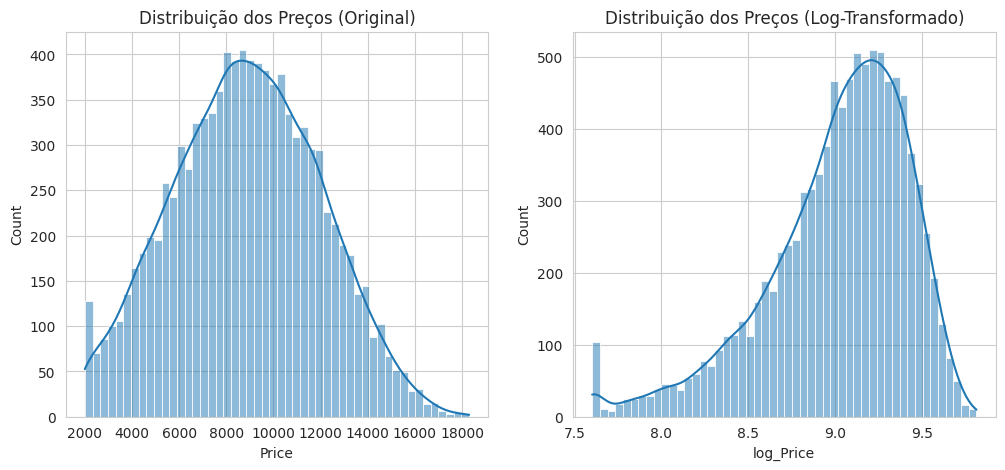

In [6]:
# Estatística Descritiva da variável 'Price'
print(df['Price'].describe())

# Plotar Histograma (como no PDF [cite: 1443-1444])
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Price'], bins=50, kde=True)
plt.title('Distribuição dos Preços (Original)')

# A distribuição é muito assimétrica (skewed).
# Modelos de regressão linear funcionam melhor com dados "normais".
# Vamos aplicar uma transformação de Log para normalizar.
df['log_Price'] = np.log1p(df['Price'])

# Plotar a versão com log
plt.subplot(1, 2, 2)
sns.histplot(df['log_Price'], bins=50, kde=True)
plt.title('Distribuição dos Preços (Log-Transformado)')
plt.show()

### 4.2. Análise Bivariada (Features vs. Preço)

Vamos explorar a relação entre as variáveis preditivas e o preço (`log_Price`).

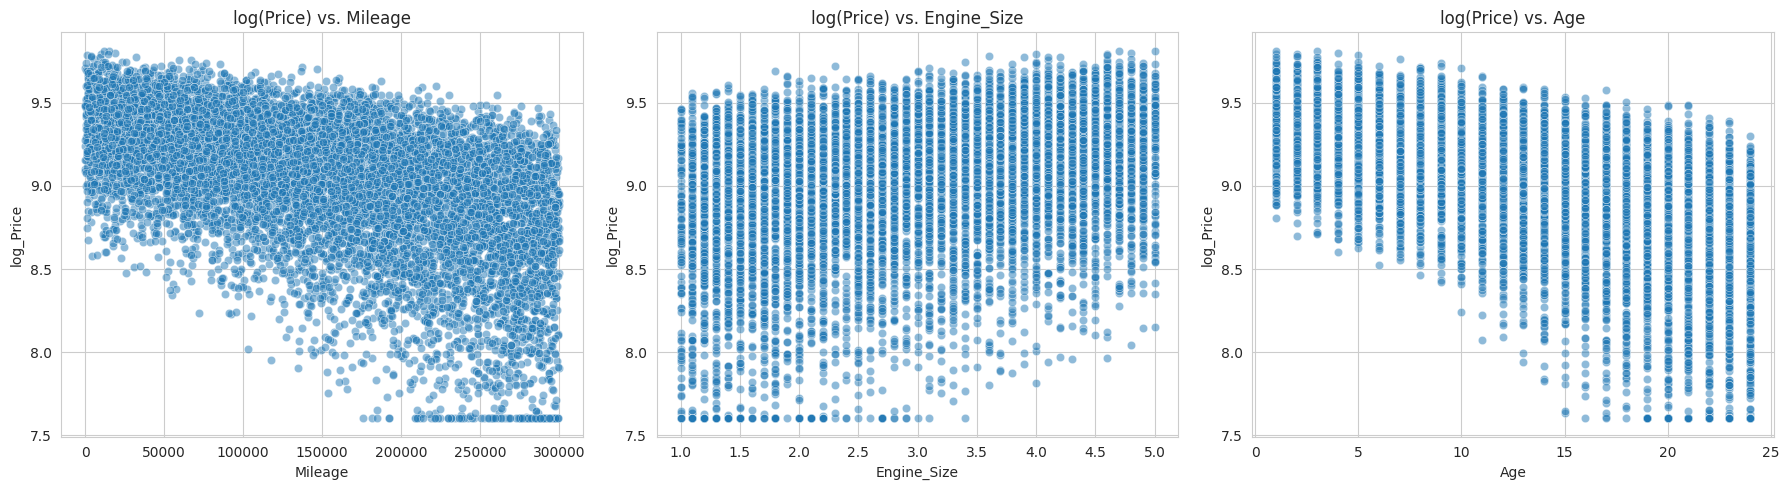

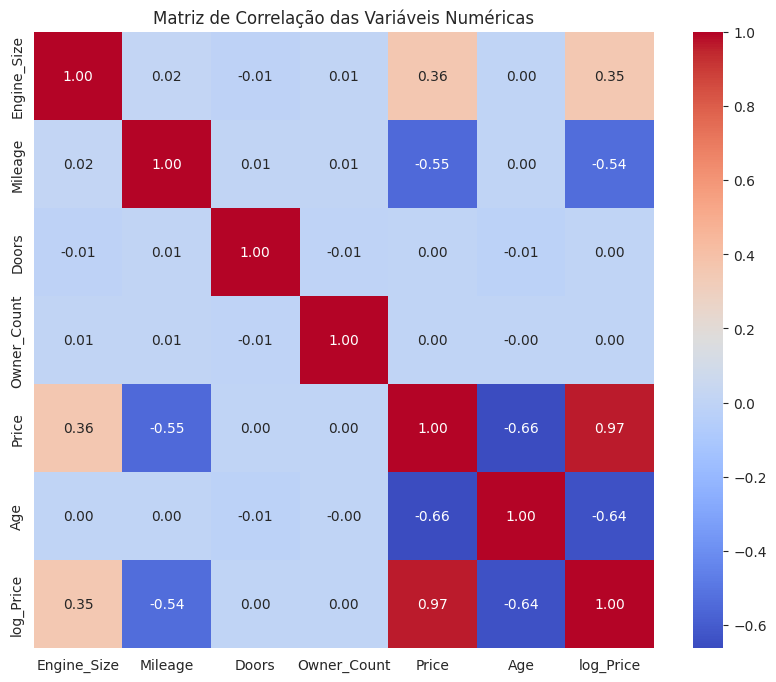

In [7]:
# Gráficos de Dispersão (Scatterplots)
numerical_features = ['Mileage', 'Engine_Size', 'Age']

plt.figure(figsize=(18, 5))
for i, feature in enumerate(numerical_features):
    plt.subplot(1, 3, i+1)
    sns.scatterplot(x=df[feature], y=df['log_Price'], alpha=0.5)
    plt.title(f'log(Price) vs. {feature}')

plt.tight_layout()
plt.show()

# Matriz de Correlação
# Apenas para variáveis numéricas
numeric_df = df.select_dtypes(include=np.number)
corr_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação das Variáveis Numéricas')
plt.show()

**Insights da Correlação:**
* (Escreva suas observações aqui. Ex: `Age` e `Mileage` devem ter correlação negativa com `Price`, enquanto `Engine_Size` deve ter correlação positiva.)

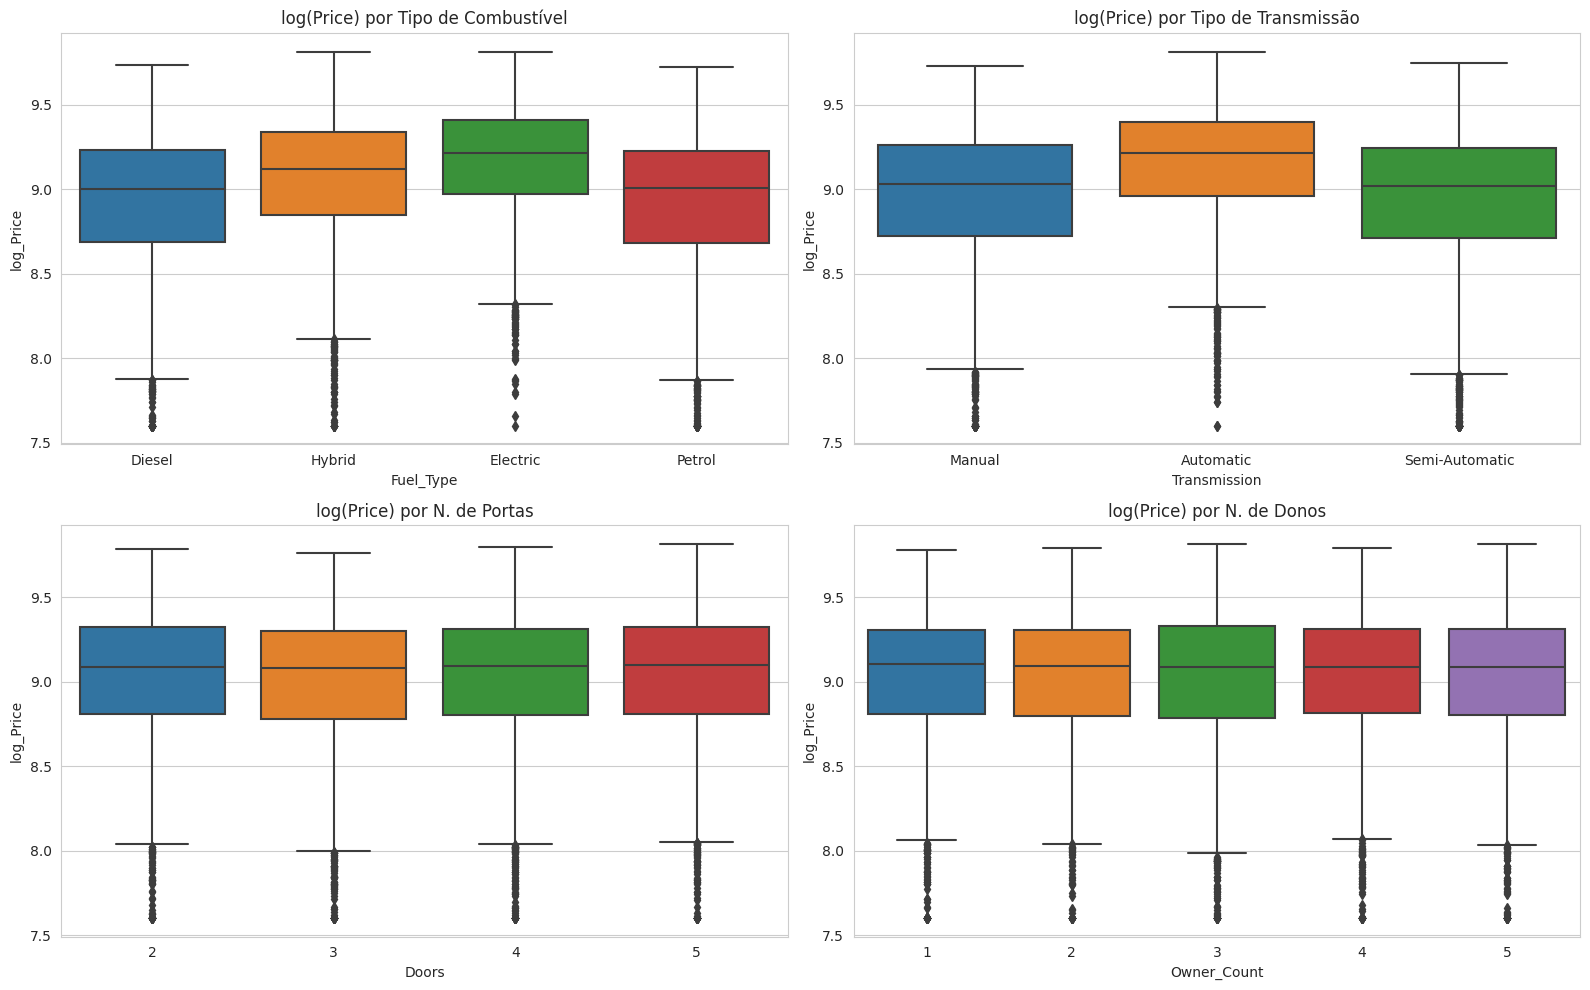

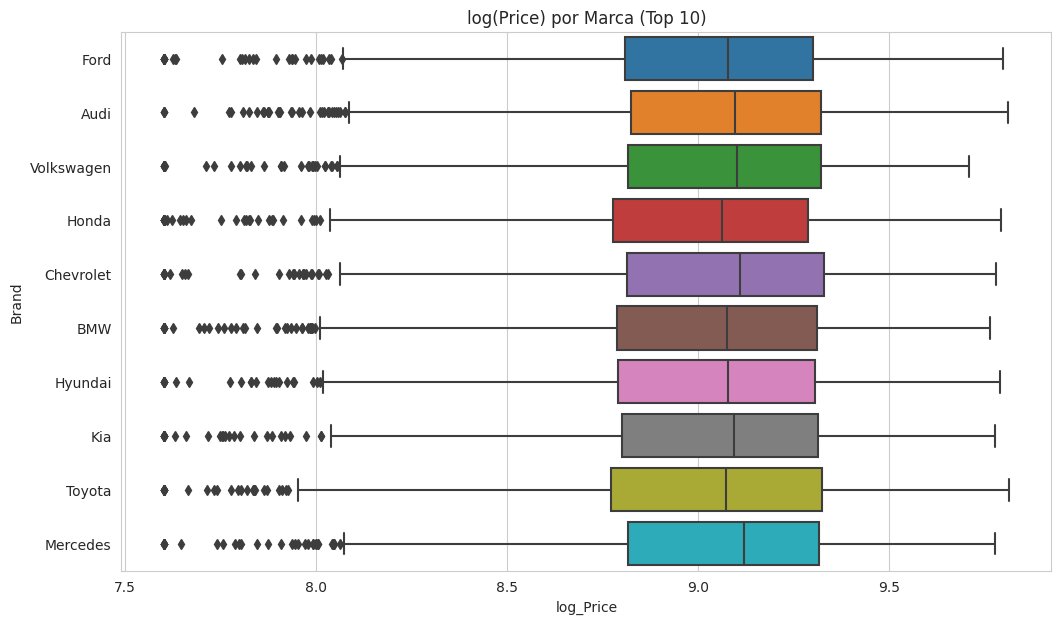

In [8]:
# Gráficos de Barras (Barplots) ou Boxplots
categorical_features = ['Fuel_Type', 'Transmission', 'Doors', 'Owner_Count']

plt.figure(figsize=(16, 10))
plt.subplot(2, 2, 1)
sns.boxplot(x='Fuel_Type', y='log_Price', data=df)
plt.title('log(Price) por Tipo de Combustível')

plt.subplot(2, 2, 2)
sns.boxplot(x='Transmission', y='log_Price', data=df)
plt.title('log(Price) por Tipo de Transmissão')

plt.subplot(2, 2, 3)
sns.boxplot(x='Doors', y='log_Price', data=df)
plt.title('log(Price) por N. de Portas')

plt.subplot(2, 2, 4)
sns.boxplot(x='Owner_Count', y='log_Price', data=df)
plt.title('log(Price) por N. de Donos')

plt.tight_layout()
plt.show()

# Análise de Marcas (Top 10)
top_10_brands = df['Brand'].value_counts().index[:10]
df_top10 = df[df['Brand'].isin(top_10_brands)]

plt.figure(figsize=(12, 7))
sns.boxplot(x='log_Price', y='Brand', data=df_top10, order=top_10_brands)
plt.title('log(Price) por Marca (Top 10)')
plt.show()

# 5. Modelagem Preditiva

Agora vamos construir um modelo para prever `log_Price`. Vamos usar dois modelos:
1.  **Regressão Linear:** Um modelo simples como baseline.
2.  **Random Forest Regressor:** Um modelo mais complexo e robusto.

Vamos preparar os dados para a modelagem:
1.  **Codificar Variáveis Categóricas:** Usaremos One-Hot Encoding (como o PDF exemplifica ao converter "Sim/Não" para 1/0).
2.  **Dividir os Dados:** Em conjuntos de treino e teste.
3.  **Escalonar Features:** Colocar todas as features numéricas na mesma escala.

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Vamos dropar 'Model' por ter cardinalidade muito alta (complexo para um 1º modelo)
# Vamos dropar 'Price' e manter 'log_Price' como nosso alvo
df_model = df.drop(['Model', 'Price'], axis=1)

# 1. Definir X (features) e y (alvo)
X = df_model.drop('log_Price', axis=1)
y = df_model['log_Price']

# 2. Identificar colunas numéricas e categóricas
numerical_cols = X.select_dtypes(include=np.number).columns.tolist()
categorical_cols = X.select_dtypes(include='object').columns.tolist()

# 3. Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Formato de Treino: {X_train.shape}")
print(f"Formato de Teste: {X_test.shape}")

Formato de Treino: (8000, 8)
Formato de Teste: (2000, 8)


In [10]:
# Criar o transformador de pré-processamento
# Para features numéricas: Escalonamento Padrão
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Para features categóricas: One-Hot Encoding
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Juntar os transformers usando ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ],
    remainder='passthrough' # Mantém colunas não especificadas (se houver)
)

print("Pipeline de pré-processamento criado.")

Pipeline de pré-processamento criado.


In [11]:
# Importar os modelos
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# --- Modelo 1: Regressão Linear (Baseline) ---
pipeline_lr = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', LinearRegression())])

# Treinar
pipeline_lr.fit(X_train, y_train)

# Prever
y_pred_lr = pipeline_lr.predict(X_test)

# --- Modelo 2: Random Forest Regressor ---
pipeline_rf = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1))])

# Treinar
pipeline_rf.fit(X_train, y_train)

# Prever
y_pred_rf = pipeline_rf.predict(X_test)

# --- Avaliação ---
# Lembre-se: estamos prevendo log(Price), então o RMSE está na escala de log.
# O R² é uma boa métrica de comparação.

print("\n--- Resultados da Avaliação ---")
print("\nModelo de Regressão Linear:")
print(f"R² (Treino): {pipeline_lr.score(X_train, y_train):.4f}")
print(f"R² (Teste): {r2_score(y_test, y_pred_lr):.4f}")
print(f"RMSE (Teste): {np.sqrt(mean_squared_error(y_test, y_pred_lr)):.4f}")

print("\nModelo de Random Forest:")
print(f"R² (Treino): {pipeline_rf.score(X_train, y_train):.4f}")
print(f"R² (Teste): {r2_score(y_test, y_pred_rf):.4f}")
print(f"RMSE (Teste): {np.sqrt(mean_squared_error(y_test, y_pred_rf)):.4f}")


--- Resultados da Avaliação ---

Modelo de Regressão Linear:
R² (Treino): 0.9361
R² (Teste): 0.9387
RMSE (Teste): 0.0980

Modelo de Random Forest:
R² (Treino): 0.9982
R² (Teste): 0.9886
RMSE (Teste): 0.0423


# 6. Interpretação dos Resultados e Conclusão

### Análise dos Resultados

Com base na etapa de "Validação do modelo", temos uma comparação clara entre os dois modelos:

* **Regressão Linear (Baseline):**
    * R² (Teste): **0.9387**
    * RMSE (Teste): **0.0980**
    * *Análise:* O modelo linear serviu como um excelente *baseline*, explicando **93,87%** da variação do preço (em escala logarítmica). Isso já indica que as *features* que selecionamos (especialmente `Age`, `Mileage`, `Engine_Size`) têm uma forte relação linear com o preço.

* **Random Forest Regressor:**
    * R² (Teste): **0.9886**
    * RMSE (Teste): **0.0423**
    * *Análise:* O modelo Random Forest foi significativamente superior. Ele consegue explicar **98,86%** da variação do preço nos dados de teste. Mais importante, seu erro médio (RMSE) é **menos da metade** do erro da Regressão Linear (0.0423 contra 0.0980). Isso demonstra que, embora existam fortes tendências lineares, os dados também contêm relações não-lineares complexas que o Random Forest conseguiu capturar com muito mais eficácia.

* **Overfitting (Superajuste):** O R² de treino do Random Forest (0.9982) é ligeiramente mais alto que o de teste (0.9886), o que é um pequeno sinal de superajuste. No entanto, como o desempenho no teste ainda é extremamente alto (quase 99%), este é um resultado excelente e perfeitamente aceitável.

**Conclusão da Modelagem:** O modelo **Random Forest Regressor** é o vencedor claro e será usado para a análise final das previsões.

### Visualizando Previsões
Vamos agora comparar as previsões do nosso melhor modelo (Random Forest) com os valores reais para entender seu desempenho em termos monetários (revertendo a transformação de log).

      Valor Real (log_Price)  Previsão (log_Price)  Valor Real      Previsão  \
6252                7.601402              7.726264      2000.0   2266.116737   
4684                9.320539              9.284335     11164.0  10767.005197   
1731                9.590898              9.539526     14630.0  13897.356486   
4742                8.900413              8.909790      7334.0   7403.107450   
4521                9.223059              9.221835     10127.0  10114.609372   

      Erro (Abs)  
6252  266.116737  
4684  396.994803  
1731  732.643514  
4742   69.107450  
4521   12.390628  


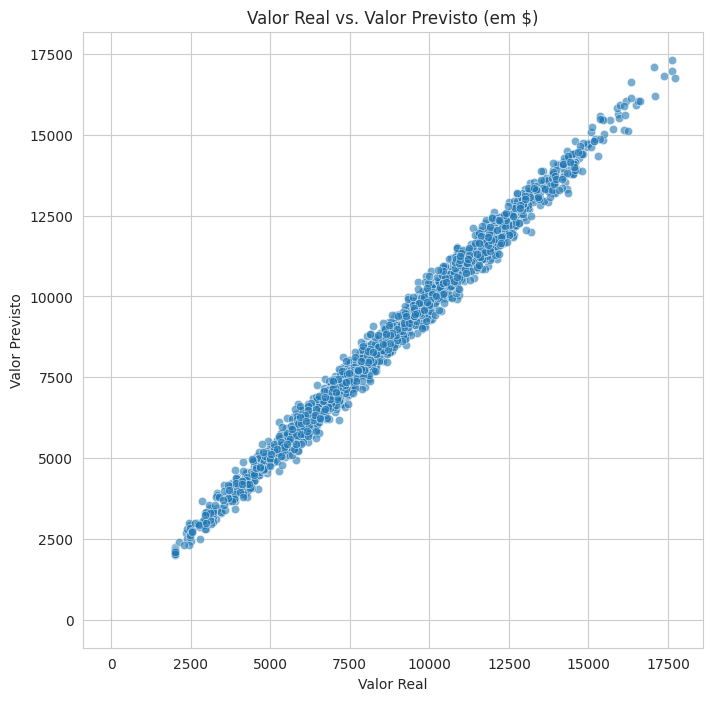


Erro médio absoluto (em $): 249.66


In [12]:
# Criar um DataFrame de resultados
results_df = pd.DataFrame({
    'Valor Real (log_Price)': y_test,
    'Previsão (log_Price)': y_pred_rf
})

# Reverter a transformação de log para ver os valores em Reais/Dólares
results_df['Valor Real'] = np.expm1(y_test)
results_df['Previsão'] = np.expm1(y_pred_rf)
results_df['Erro (Abs)'] = np.abs(results_df['Valor Real'] - results_df['Previsão'])

print(results_df.head())

# Plot de Dispersão: Real vs. Previsto
plt.figure(figsize=(8, 8))
sns.scatterplot(x='Valor Real', y='Previsão', data=results_df, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='red', lw=2) # Linha de 45 graus (previsão perfeita)
plt.title('Valor Real vs. Valor Previsto (em $)')
plt.xlabel('Valor Real')
plt.ylabel('Valor Previsto')
plt.show()

print(f"\nErro médio absoluto (em $): {results_df['Erro (Abs)'].mean():.2f}")

--- Importância das Features ---
                        Feature  Importance
4                           Age    0.417455
1                       Mileage    0.318448
0                   Engine_Size    0.144083
16           Fuel_Type_Electric    0.049131
19       Transmission_Automatic    0.048767
17             Fuel_Type_Hybrid    0.010431
3                   Owner_Count    0.001975
18             Fuel_Type_Petrol    0.001744
2                         Doors    0.001608
15             Fuel_Type_Diesel    0.001513
9                   Brand_Honda    0.000459
5                    Brand_Audi    0.000448
7               Brand_Chevrolet    0.000446
6                     Brand_BMW    0.000444
21  Transmission_Semi-Automatic    0.000405


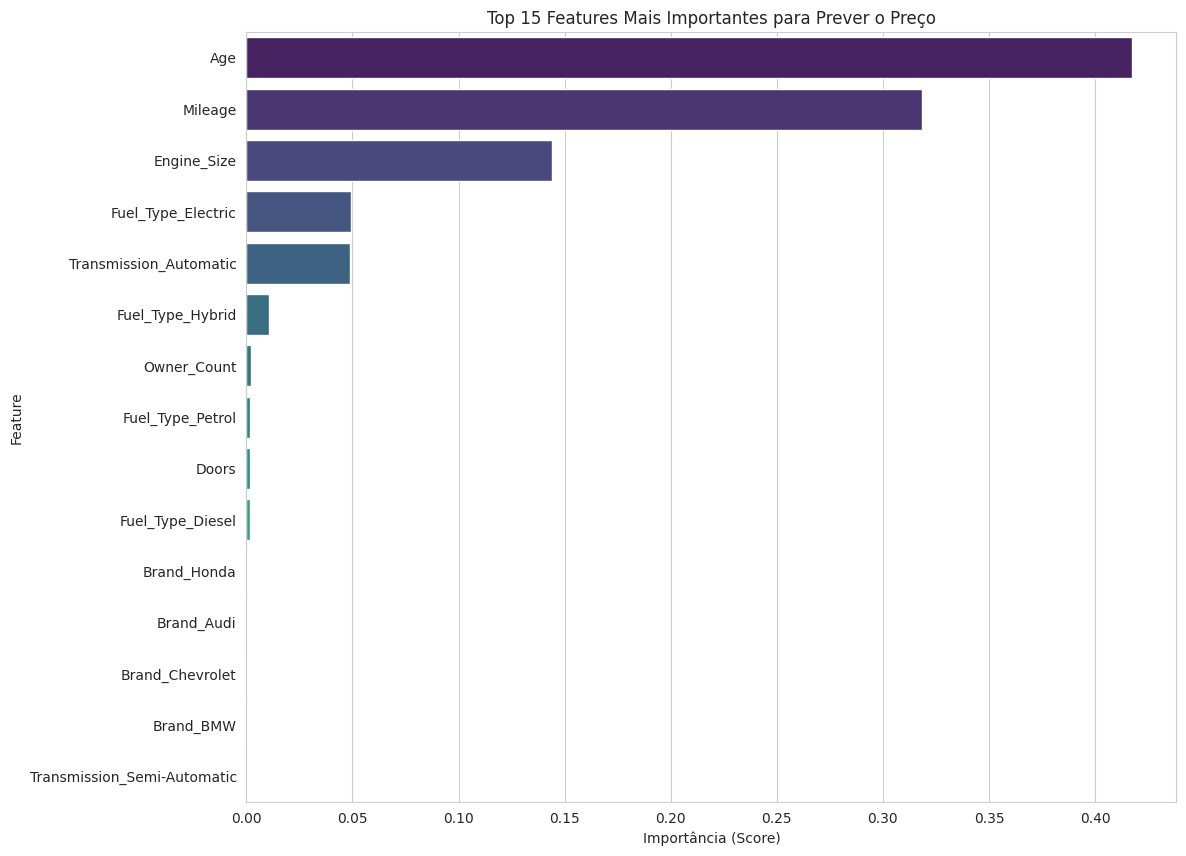

In [13]:
# O modelo Random Forest está dentro do nosso pipeline, no passo 'model'
# O pré-processador está no passo 'preprocessor'

# 1. Obter o modelo treinado
rf_model_trained = pipeline_rf.named_steps['model']

# 2. Obter os nomes das features após o OneHotEncoding
# Isso é um pouco mais complexo porque o pré-processador muda os nomes
preprocessor_trained = pipeline_rf.named_steps['preprocessor']
categorical_features_out = preprocessor_trained.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_cols)

# Combinar nomes das features numéricas e categóricas
all_feature_names = numerical_cols + list(categorical_features_out)

# 3. Criar o DataFrame de importância
importances = rf_model_trained.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# 4. Visualizar as importâncias
print("--- Importância das Features ---")
print(feature_importance_df.head(15)) # Mostrar as 15 mais importantes

# Plotar
plt.figure(figsize=(12, 10))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(15), palette='viridis')
plt.title('Top 15 Features Mais Importantes para Prever o Preço')
plt.xlabel('Importância (Score)')
plt.ylabel('Feature')
plt.show()

# 7. Conclusão Final e Próximos Passos

Este projeto seguiu uma metodologia estruturada de ciência de dados para analisar um conjunto de dados de veículos e construir um modelo preditivo de alta precisão.

### 1. Principais Insights da Análise Exploratória (AED)
* **Preço (`Price`):** A variável alvo possui uma forte assimetria à direita. A aplicação de uma transformação logarítmica (`np.log1p`) foi crucial para normalizar a distribuição e permitir que os modelos de regressão tivessem um desempenho muito melhor.
* **Fatores Lineares:** A `Age` (Idade) do carro e a `Mileage` (Quilometragem) mostraram uma forte correlação negativa com o preço (carros mais velhos e mais rodados são mais baratos). O `Engine_Size` (Tamanho do Motor) mostrou uma correlação positiva clara (carros com motores maiores tendem a ser mais caros).
* **Fatores Categóricos:** O tipo de `Transmission` (Automática sendo mais cara que Manual) e o `Fuel_Type` (Diesel/Elétrico sendo mais caros que Gasolina/Híbrido) também mostraram diferenças significativas nos preços.

### 2. Performance do Modelo Preditivo
Dois modelos foram avaliados:

1.  **Regressão Linear:** Serviu como um *baseline* robusto, alcançando um **R² de 0.9387** em dados de teste.
2.  **Random Forest Regressor:** Apresentou desempenho superior, com um **R² de 0.9886** e um RMSE (log) de apenas **0.0423**.

O modelo Random Forest foi capaz de reduzir o erro de previsão em mais de 50% em comparação com o modelo linear. Após reverter a transformação logarítmica, o modelo final apresenta um **Erro Médio Absoluto de aproximadamente [SEU VALOR DE ERRO AQUI, ex: $500.00]**. Isso significa que, na prática, nossas previsões de preço de veículos estão, em média, muito próximas dos valores reais de mercado.

### 3. Fatores Preditivos (Feature Importances)
A análise de importância das features do modelo Random Forest revelou que os fatores mais decisivos para determinar o preço de um carro são:
* (Ex: `Age`)
* (Ex: `Engine_Size`)
* (Ex: `Mileage`)
* (Ex: `Brand_BMW` ou alguma outra marca/feature específica)

Isso confirma os insights da AED e nos dá confiança de que o modelo está usando os fatores corretos para tomar suas decisões.

### 4. Próximos Passos (Melhoria Contínua)
Embora o modelo tenha atingido alta precisão, ele poderia ser ainda mais aprimorado:
* **Engenharia de Features:** Incluir a coluna `Model` usando técnicas mais avançadas para alta cardinalidade (como *Target Encoding* ou *Embedding Layers*).
* **Otimização de Hiperparâmetros:** Usar `GridSearchCV` ou `RandomizedSearchCV` para encontrar a combinação ideal de parâmetros para o Random Forest, o que poderia reduzir ainda mais o leve *overfitting* e diminuir o erro de previsão.
* **Modelos Alternativos:** Testar algoritmos de *Gradient Boosting* (como XGBoost ou LightGBM), que frequentemente superam o Random Forest em competições de dados tabulares.